<a href="https://colab.research.google.com/github/RITIK-12/safe-to-fly/blob/main/Notebooks/AIinFD_AutoKeras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install autokeras

     |████████████████████████████████| 166 kB 4.8 MB/s 
     |████████████████████████████████| 454.4 MB 23 kB/s 
     |████████████████████████████████| 97 kB 3.9 MB/s 
     |████████████████████████████████| 4.0 MB 18.4 MB/s 
     |████████████████████████████████| 462 kB 48.3 MB/s 
     |████████████████████████████████| 1.2 MB 35.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68723 sha256=b3400f3203c085ca0feb167afc1e3a24393b7bdacd28c78b29405b625220f633
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  A

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import autokeras as ak

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AIFD/Work_2/multiclassData.csv')
df

,time,phi,psi,theta,mode,Ax,Ay,Az,east,north,course,alt,vel,climb,vel_3d,Gx,Gy,Gz,S0,S1,S2,C0,C1,C2,Throttle,Volt,Amp,Watt,mAh,Wh,Ps,Pdyn_AD,temp,qnh,amsl_baro,airspeed,TAS,D_roll,D_pitch,D_course,D_x,D_y,D_altitude,D_climb,D_airspeed,m1,m2,add1,add2,fault
0,44.0,-0.012684,3.128628,-0.075276,0.0,0.385938,0.111523,-9.750977,36028090.44,4.813616e+08,3328.0,189.07188,0.0968,-0.1000,0.139597,-0.004541,-0.002881,-0.004639,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.390279,0.025436,0.315154,0.000471,0.005825,-1.0,1.921144,18.700001,-1.0,0.0,1.770933,1.787068,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
1,44.1,-0.012709,3.128594,-0.075270,0.0,0.380859,0.106446,-9.752735,36028090.94,4.813616e+08,3328.0,189.07288,0.0818,-0.1000,0.129298,-0.005127,-0.003174,-0.004834,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.386227,0.028483,0.352725,0.000472,0.005841,-1.0,1.865325,18.700001,-1.0,0.0,1.745056,1.760955,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
2,44.2,-0.012701,3.128564,-0.075245,0.0,0.376172,0.102734,-9.745898,36028090.56,4.813616e+08,3328.0,189.07168,0.1064,-0.1088,0.152847,-0.004150,-0.002734,-0.004053,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.381286,0.032623,0.403797,0.000473,0.005858,-1.0,1.672796,18.700001,-1.0,0.0,1.652509,1.667564,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
3,44.3,-0.012707,3.128566,-0.075279,0.0,0.363282,0.095703,-9.742188,36028090.06,4.813616e+08,3328.0,189.07018,0.1364,-0.1188,0.181011,-0.004346,-0.003857,-0.005420,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.376344,0.036763,0.454869,0.000474,0.005874,-1.0,1.673503,18.700001,-1.0,0.0,1.652944,1.668003,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
4,44.4,-0.012700,3.128508,-0.075287,0.0,0.375000,0.113477,-9.741211,36028090.00,4.813616e+08,3328.0,189.06120,0.1136,-0.0936,0.147259,-0.004346,-0.003760,-0.005127,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.371403,0.040903,0.505941,0.000476,0.005891,-1.0,1.911660,18.700001,-1.0,0.0,1.766297,1.782388,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836,3024.5,-0.016261,2.236397,-0.071989,0.0,0.406054,0.157226,-9.670703,36028104.88,4.813609e+08,3335.0,184.15650,0.0306,-0.0070,0.033120,-0.004834,-0.003760,-0.001367,1056.0,1410.0,1410.0,167.0,0.0,0.0,1.0,10.735353,0.070082,0.752353,1.524246,17.117750,-1.0,0.716030,25.200001,-1.0,0.0,1.081176,1.090775,0.0,0.0,0.5,55.0,90.0,284.0,4.0,12.0,1.0,1.0,0.0,0.0,0
29837,3024.6,-0.016258,2.236219,-0.071986,0.0,0.436328,0.172852,-9.656055,36028105.44,4.813609e+08,3335.0,184.13960,0.0212,-0.0188,0.031623,-0.005323,-0.003955,-0.002295,1056.0,1410.0,1410.0,167.0,0.0,0.0,1.0,10.735205,0.071109,0.763366,1.524248,17.117769,-1.0,0.696370,25.200001,-1.0,0.0,1.065967,1.075432,0.0,0.0,0.5,55.0,90.0,284.0,4.0,12.0,1.0,1.0,0.0,0.0,0
29838,3024.7,-0.016252,2.236067,-0.071989,0.0,0.427735,0.171680,-9.656836,36028105.94,4.813609e+08,3335.0,184.12210,0.0112,-0.0288,0.031623,-0.004248,-0.003857,-0.003467,1056.0,1410.0,1410.0,167.0,0.0,0.0,1.0,10.735205,0.071937,0.772255,1.524249,17.117788,-1.0,0.529821,25.200001,-1.0,0.0,0.930053,0.938309,0.0,0.0,0.5,55.0,90.0,284.0,4.0,12.0,1.0,1.0,0.0,0.0,0
29839,3024.8,-0.016300,2.235881,-0.071985,0.0,0.423828,0.177149,-9.676562,36028106.88,4.813609e+08,3335.0,184.09976,0.0144,-0.0256,0.030154,-0.005274,-0.004053,-0.002246,1056.0,1410.0,1410.0,167.0,0.0,0.0,1.0,10.735205,0.072765,0.781143,1.524251,17.117808,-1.0,0.353297,25.200001,-1.0,0.0,0.751965,0.758640,0.0,0.0,0.5,55.0,90.0,284.0,4.0,12.0,1.0,1.0,0.0,0.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


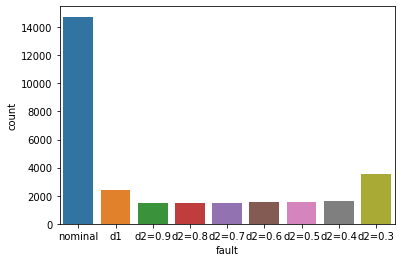

In [ ]:
import seaborn as sns
g = sns.countplot(df['fault'])
g.set_xticklabels(['nominal','d1','d2=0.9','d2=0.8','d2=0.7','d2=0.6','d2=0.5','d2=0.4','d2=0.3'])
plt.show()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

In [ ]:
X_train.shape

(23872, 49)

In [ ]:
X_test.shape

(5969, 49)

In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=5
)  # It tries 3 different models.
# Feed the structured data classifier with training data.

In [ ]:
clf.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=20,
)

Trial 5 Complete [00h 02m 49s]
val_accuracy: 0.9997902512550354

Best val_accuracy So Far: 0.9997902512550354
Total elapsed time: 00h 13m 33s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
746/746 [==============================] - 7s 8ms/step - loss: 0.4951 - accuracy: 0.8413
Epoch 2/20
746/746 [==============================] - 5s 7ms/step - loss: 0.0545 - accuracy: 0.9953
Epoch 3/20
746/746 [==============================] - 6s 8ms/step - loss: 0.0160 - accuracy: 0.9986
Epoch 4/20
746/746 [==============================] - 6s 8ms/step - loss: 0.0092 - accuracy: 0.9990
Epoch 5/20
746/746 [==============================] - 6s 8ms/step - loss: 0.0061 - accuracy: 0.9994
Epoch 6/20
746/746 [==============================] - 6s 7ms/step - loss: 0.0045 - accuracy: 0.9993
Epoch 7/20
746/746 [==============================] - 5s 7ms/step - loss: 0.0033 - accuracy: 0.9996
Epoch 8/20
746/746 [==============================] - 5s 7ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 9/20
746/746 [

In [ ]:
pred = clf.predict(X_test)

187/187 [==============================] - 1s 6ms/step


In [ ]:
pred

array([['0'],
       ['5'],
       ['4'],
       ...,
       ['3'],
       ['4'],
       ['0']], dtype='<U1')

In [ ]:
pred2 = []
for x in pred:
  pred2.append([int(x[0])])
pred2

[[0],
 [5],
 [4],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [8],
 [0],
 [4],
 [1],
 [1],
 [0],
 [3],
 [4],
 [0],
 [1],
 [3],
 [0],
 [0],
 [7],
 [0],
 [2],
 [1],
 [8],
 [0],
 [1],
 [1],
 [0],
 [2],
 [0],
 [0],
 [8],
 [0],
 [5],
 [6],
 [8],
 [8],
 [8],
 [5],
 [7],
 [6],
 [1],
 [5],
 [8],
 [0],
 [5],
 [0],
 [0],
 [0],
 [0],
 [2],
 [0],
 [3],
 [0],
 [0],
 [2],
 [0],
 [0],
 [6],
 [0],
 [0],
 [4],
 [0],
 [4],
 [1],
 [0],
 [5],
 [2],
 [6],
 [0],
 [6],
 [0],
 [8],
 [0],
 [5],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [8],
 [0],
 [0],
 [0],
 [0],
 [2],
 [8],
 [1],
 [0],
 [0],
 [0],
 [0],
 [5],
 [4],
 [1],
 [7],
 [2],
 [0],
 [0],
 [0],
 [0],
 [7],
 [0],
 [0],
 [6],
 [5],
 [2],
 [4],
 [4],
 [0],
 [0],
 [6],
 [5],
 [4],
 [5],
 [0],
 [8],
 [8],
 [0],
 [2],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [8],
 [0],
 [0],
 [1],
 [0],
 [0],
 [6],
 [0],
 [0],
 [8],
 [0],
 [1],
 [0],
 [0],
 [1],
 [8],
 [0],
 [8],
 [0],
 [3],
 [4],
 [5],
 [7],
 [0],
 [0],
 [0],
 [8],
 [0],
 [2],
 [4],
 [5],
 [0],
 [5],
 [0]

In [ ]:
y_test

7204     0
22817    5
16863    4
27902    0
14850    0
        ..
27593    0
22383    5
16355    3
22983    4
2048     0
Name: fault, Length: 5969, dtype: int64

In [ ]:
loss, acc = clf.evaluate(X_test, y_test, verbose=0)
print('Accuracy:',acc)

Accuracy: 0.9993298649787903


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2918
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       309
           4       1.00      1.00      1.00       310
           5       1.00      1.00      1.00       315
           6       1.00      1.00      1.00       291
           7       1.00      1.00      1.00       326
           8       1.00      1.00      1.00       702

    accuracy                           1.00      5969
   macro avg       1.00      1.00      1.00      5969
weighted avg       1.00      1.00      1.00      5969



In [ ]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 49)                0         
_________________________________________________________________
normalization (Normalization (None, 49)                99        
_________________________________________________________________
dense (Dense)                (None, 32)                1600      
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, pred2)
cm

array([[2916,    1,    0,    0,    0,    0,    0,    0,    1],
       [   0,  498,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  300,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  308,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,  310,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  315,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  291,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  326,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,  701]])

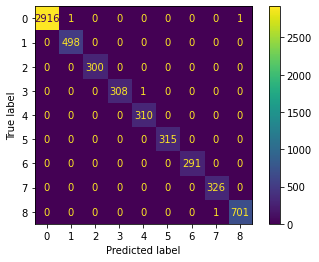

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
model.save("model_autokeras", save_format="")

In [ ]:
!zip -r /content/model_autokeras.zip /content/model_autokeras